In [2]:
! pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 33.2 MB/s eta 0:00:00


In [52]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [53]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [54]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [55]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [56]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


---

### Prepare the Data

In [57]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = StandardScaler().fit_transform(df_market_data[[
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y']])

In [58]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
])

# Copy the crypto names from the original data
df_market_data_scaled['coin_id'] = df_market_data.index
# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index('coin_id')

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [59]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [60]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
  k_model = KMeans(n_clusters=i, random_state=1)
  k_model.fit(df_market_data_scaled)
  inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [61]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


<Axes: xlabel='k'>

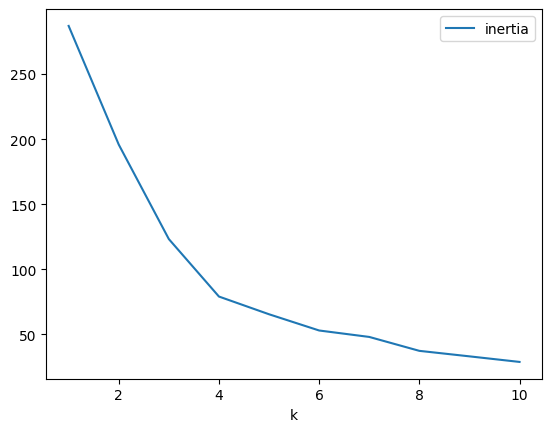

In [62]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_df.plot('k', 'inertia')

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [63]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state = 1)

In [64]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [65]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4_pred = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
k_4_pred

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1],
      dtype=int32)

In [66]:
# Create a copy of the DataFrame
df_cryptocurrencies = df_market_data_scaled.copy()

In [67]:
# Add a new column to the DataFrame with the predicted clusters
df_cryptocurrencies['clusters'] = k_4_pred

# Display sample data
df_cryptocurrencies.sample(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
digibyte,1.217453,-0.607714,-0.907066,0.449939,-0.662530,0.572367,-0.132482,1
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,3
vechain,0.585089,-0.994231,-2.217108,-0.603898,-0.930423,0.077149,-0.117482,1
usd-coin,0.034352,-0.733026,-0.023140,-0.065775,0.002925,-0.550599,-0.282232,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3


In [68]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
k_4_scatter = df_cryptocurrencies.hvplot.scatter(
    x = 'price_change_percentage_24h',
    y = 'price_change_percentage_7d',
    by = 'clusters',
    hover_cols = ['coin_id']
)

hvplot.show(k_4_scatter)

Launching server at http://localhost:32887


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

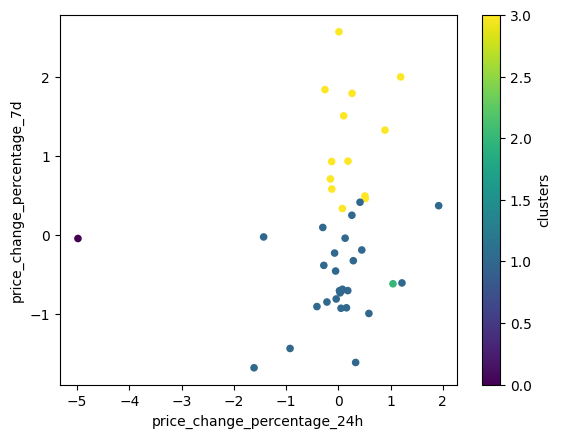

In [105]:
df_cryptocurrencies.plot.scatter('price_change_percentage_24h', 'price_change_percentage_7d', c = 'clusters', cmap = 'viridis')

---

### Optimize Clusters with Principal Component Analysis.

In [69]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [71]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
market_data_pca = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame.
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [84]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
print(f'Explained Variance: {pca.explained_variance_ratio_}')
variance_ratio_sum = sum(pca.explained_variance_ratio_)
print(f'Total explained variance of the three principal components: {variance_ratio_sum}')

Explained Variance: [0.3719856  0.34700813 0.17603793]
Total explained variance of the three principal components: 0.895031657030984


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895031657030984



In [88]:
# Create a new DataFrame with the PCA data.
market_data_pca_df = pd.DataFrame(market_data_pca, columns = ['PCA1', 'PCA2', 'PCA3'])
# Creating a DataFrame with the PCA data
market_data_pca_df
# Copy the crypto names from the original data
market_data_pca_df['coin_id'] = df_market_data.index

# Set the coinid column as index
market_data_pca_df = market_data_pca_df.set_index('coin_id')

# Display sample data
market_data_pca_df.sample(10)

,PCA1,PCA2,PCA3
coin_id,,,
ripple,-0.471835,-0.222660,-0.479053
cosmos,-0.306272,0.703415,1.714224
iota,-0.764665,-0.517886,0.204990
zcash,-0.425147,0.492976,1.058048
cardano,-0.345600,0.729439,1.478013
binancecoin,-0.516534,1.388377,0.804071
huobi-token,-0.407483,-0.212507,-0.351426
okb,0.064075,-1.269825,-1.098829
usd-coin,-0.438408,-0.175337,-0.663388


---

### Find the Best Value for k Using the PCA Data

In [89]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1,11))

In [90]:
from numpy.random.mtrand import random_integers
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for j in k_pca:
  pca_model = KMeans(n_clusters=j, random_state=1)
  pca_model.fit(market_data_pca_df)
  inertia_pca.append(pca_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [95]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow = {
    'k_pca': k_pca,
    'inertia_pca': inertia_pca
}
# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow)
pca_elbow_df

,k_pca,inertia_pca
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.352251
5,6,27.618972
6,7,21.134056
7,8,17.437664
8,9,13.742792
9,10,10.484890


<Axes: xlabel='k_pca'>

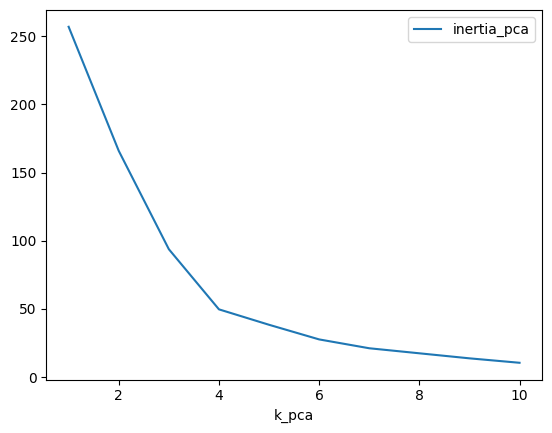

In [96]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pca_elbow_df.plot('k_pca', 'inertia_pca')

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [98]:
# Initialize the K-Means model using the best value for k
pca_k = KMeans(n_clusters=4, random_state=1)

In [99]:
# Fit the K-Means model using the PCA data
pca_k.fit(market_data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [100]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_pred = pca_k.predict(market_data_pca)
# Print the resulting array of cluster values.
pca_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [103]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_df = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_df['pred_clusters'] = pca_pred

# Display sample data
crypto_pca_df.sample(10)

,PCA1,PCA2,PCA3,pred_clusters
coin_id,,,,
nem,0.608974,0.563532,-1.148742,0
dash,-0.613923,-0.479337,0.339565,0
iota,-0.764665,-0.517886,0.204990,0
havven,0.865762,-2.261882,0.275583,0
leo-token,-0.413296,-0.674115,-1.076628,0
eos,-0.693425,-0.473815,-0.527597,0
theta-token,2.676868,-0.013954,-1.965207,0
bitcoin,-0.600667,0.842760,0.461595,1
omisego,0.111675,0.428316,-1.205398,0


In [104]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
crypto_scatter = crypto_pca_df.hvplot.scatter(
    x = 'PCA1',
    y = 'PCA2',
    c= 'pred_clusters',
    cmap = 'viridis',
    hover_cols = ['coin_id']
)
hvplot.show(crypto_scatter)

Launching server at http://localhost:46719


<Axes: xlabel='PCA1', ylabel='PCA2'>

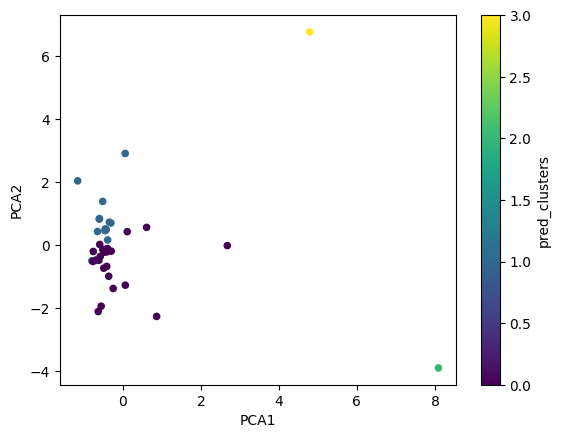

In [106]:
crypto_pca_df.plot.scatter('PCA1','PCA2', c = 'pred_clusters', cmap = 'viridis')

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

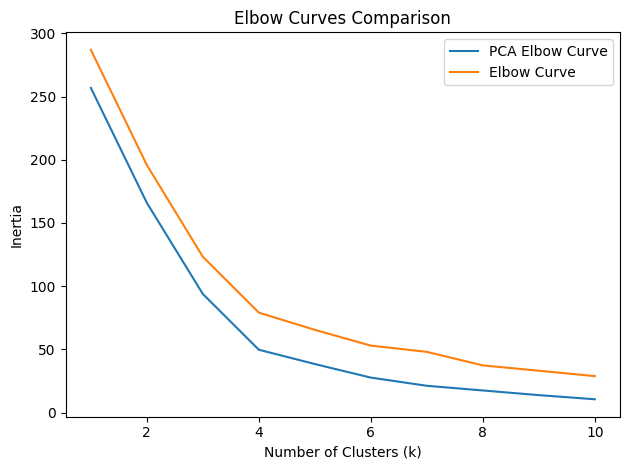

In [108]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(pca_elbow_df['k_pca'], pca_elbow_df['inertia_pca'], label='PCA Elbow Curve')

ax.plot(elbow_df['k'], elbow_df['inertia'], label='Elbow Curve')

ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Curves Comparison')
ax.legend()


plt.tight_layout()
plt.show()


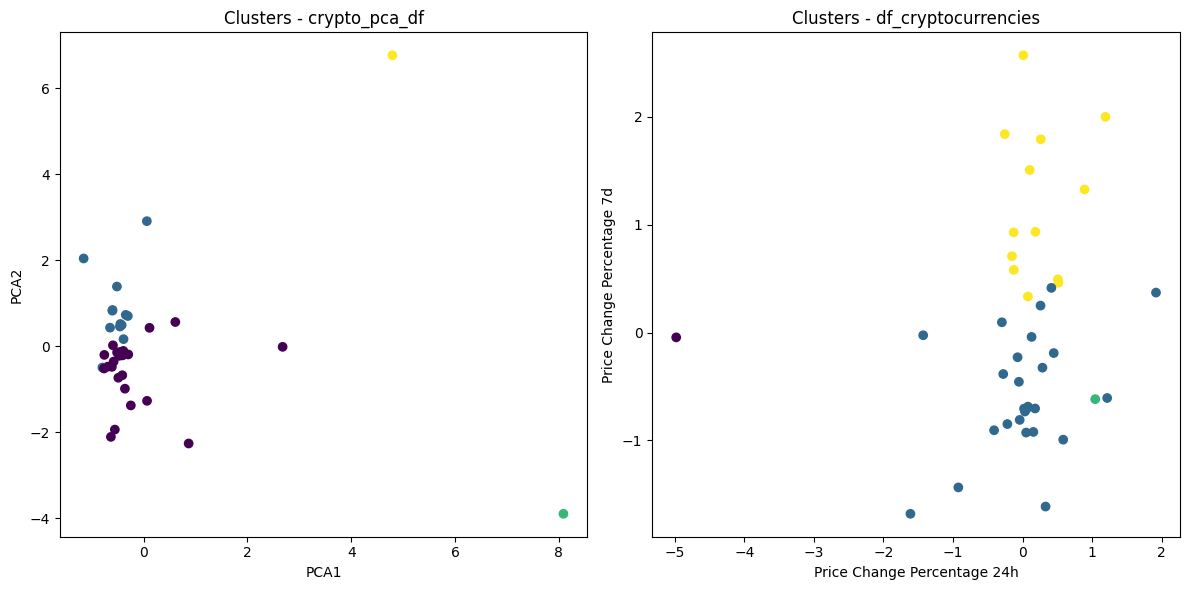

In [109]:
# Composite plot to contrast the clusters
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(crypto_pca_df['PCA1'], crypto_pca_df['PCA2'], c=crypto_pca_df['pred_clusters'], cmap='viridis')
ax[0].set_xlabel('PCA1')
ax[0].set_ylabel('PCA2')
ax[0].set_title('Clusters - crypto_pca_df')

ax[1].scatter(df_cryptocurrencies['price_change_percentage_24h'], df_cryptocurrencies['price_change_percentage_7d'], c=df_cryptocurrencies['clusters'], cmap='viridis')
ax[1].set_xlabel('Price Change Percentage 24h')
ax[1].set_ylabel('Price Change Percentage 7d')
ax[1].set_title('Clusters - df_cryptocurrencies')

plt.tight_layout()

plt.show()


#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Although the elbow curves are similar, using less features allows the clusters to be more identifiable.